In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#make all features have the same amount of non-null values.
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [10]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
train_data = x_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16665,-120.70,35.28,14.0,3768.0,682.0,1884.0,664.0,4.6071,NEAR OCEAN,239900.0
4934,-118.27,34.00,40.0,2099.0,599.0,2311.0,529.0,1.8520,<1H OCEAN,101500.0
15541,-117.12,33.07,45.0,1032.0,235.0,363.0,177.0,3.6389,<1H OCEAN,186600.0
20256,-119.17,34.21,33.0,1039.0,256.0,1432.0,272.0,3.1103,NEAR OCEAN,143500.0
19767,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043,INLAND,68400.0
...,...,...,...,...,...,...,...,...,...,...
14963,-117.00,32.76,31.0,1989.0,280.0,805.0,301.0,6.5645,<1H OCEAN,189100.0
15673,-122.44,37.80,52.0,2865.0,593.0,1029.0,577.0,5.2539,NEAR BAY,500001.0
8851,-118.42,34.09,40.0,3552.0,392.0,1024.0,370.0,15.0001,<1H OCEAN,500001.0
13539,-117.30,34.15,40.0,961.0,199.0,509.0,182.0,2.0600,INLAND,85500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

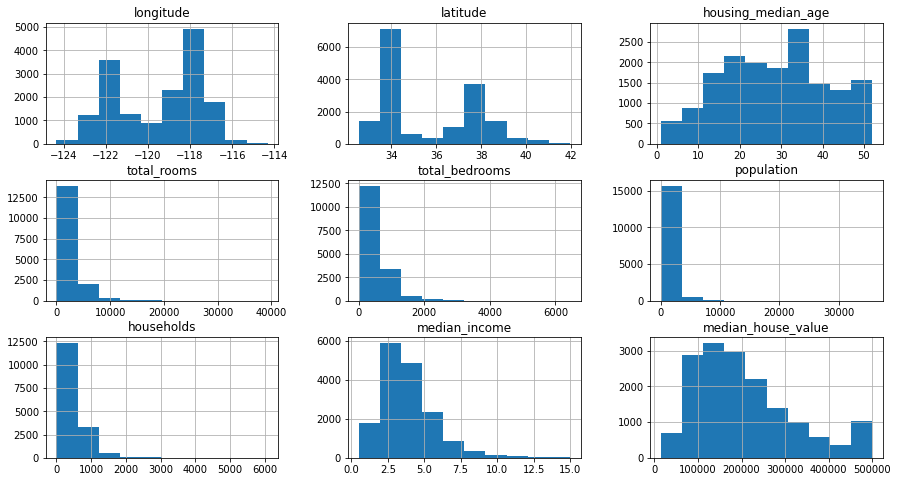

In [16]:
#multiple histograms for the distribution of the individual features.
train_data.hist(figsize=(15,8))

<Axes: >

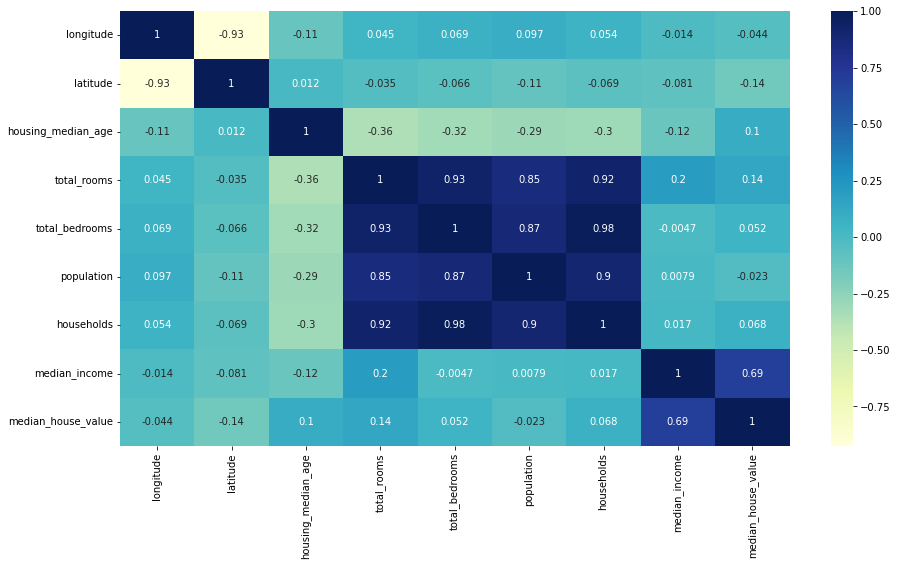

In [19]:
#heatmap to visualize the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [20]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

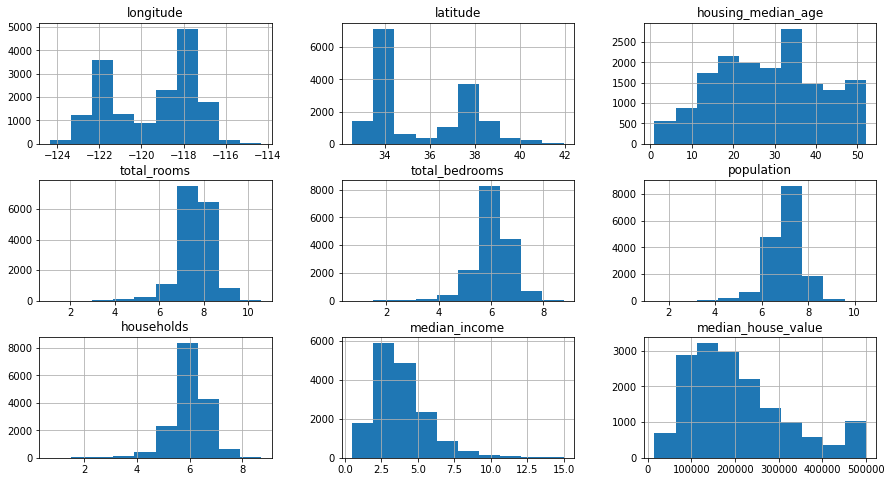

In [22]:
train_data.hist(figsize=(15,8))

In [23]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7233
INLAND        5169
NEAR OCEAN    2132
NEAR BAY      1808
ISLAND           4
Name: ocean_proximity, dtype: int64

In [26]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [28]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16665,-120.70,35.28,14.0,8.234565,6.526495,7.541683,6.499787,4.6071,239900.0,0,0,0,0,1
4934,-118.27,34.00,40.0,7.649693,6.396930,7.745868,6.272877,1.8520,101500.0,1,0,0,0,0
15541,-117.12,33.07,45.0,6.940222,5.463832,5.897154,5.181784,3.6389,186600.0,1,0,0,0,0
20256,-119.17,34.21,33.0,6.946976,5.549076,7.267525,5.609472,3.1103,143500.0,0,0,0,0,1
19767,-122.06,40.02,32.0,7.269617,5.627621,6.538140,5.541264,2.3043,68400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14963,-117.00,32.76,31.0,7.595890,5.638355,6.692084,5.710427,6.5645,189100.0,1,0,0,0,0
15673,-122.44,37.80,52.0,7.960673,6.386879,6.937314,6.359574,5.2539,500001.0,0,0,0,1,0
8851,-118.42,34.09,40.0,8.175548,5.973810,6.932448,5.916202,15.0001,500001.0,1,0,0,0,0
13539,-117.30,34.15,40.0,6.869014,5.298317,6.234411,5.209486,2.0600,85500.0,0,1,0,0,0


<Axes: >

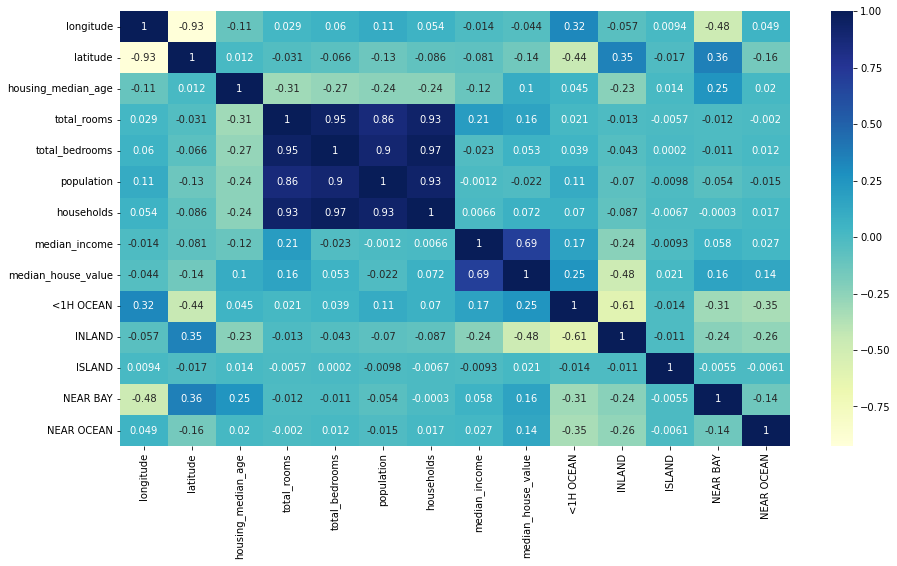

In [29]:
#new correlation heatmap with new features.
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

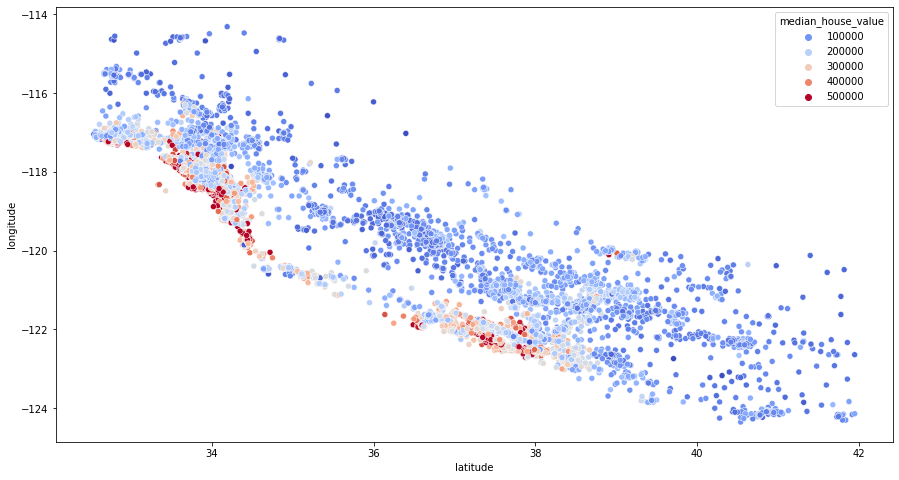

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [31]:
#feature engineering
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

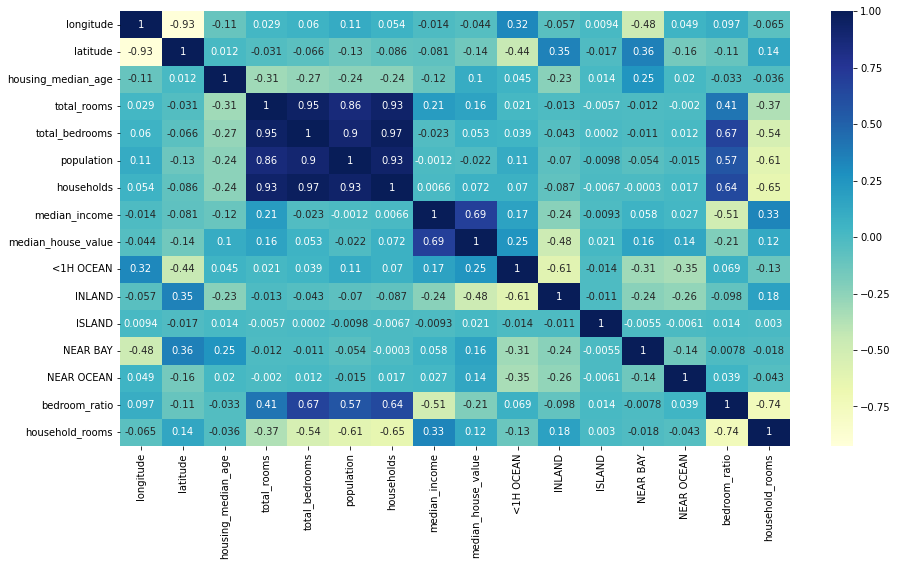

In [32]:
#new correlation heatmap after feature engineering.
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [33]:
#linear regression model.
from sklearn.linear_model import LinearRegression

x_train,y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg=LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [34]:
test_data = x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [36]:
x_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value'] 

In [37]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19083,-122.48,38.32,42.0,7.653020,6.280396,7.040536,6.100319,3.1129,149300.0,1,0,0,0,0,0.820643,1.254528
14272,-117.12,32.70,37.0,7.216709,5.855072,7.243513,5.796058,1.1681,78100.0,0,0,0,0,1,0.811322,1.245107
1543,-121.94,37.73,22.0,8.812843,6.974479,7.952967,6.902743,6.1265,260300.0,1,0,0,0,0,0.791399,1.276716
3753,-118.39,34.17,40.0,7.436617,5.921578,6.728629,5.955837,3.6563,222400.0,1,0,0,0,0,0.796273,1.248627
2535,-122.10,39.47,43.0,7.186144,5.375278,6.240276,5.288267,2.4917,77100.0,0,1,0,0,0,0.748006,1.358885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,-118.24,33.93,37.0,6.935370,5.556828,6.715383,5.517453,1.5132,86300.0,1,0,0,0,0,0.801230,1.256988
20166,-119.29,34.44,34.0,8.369853,6.778785,7.767264,6.723832,3.2279,243100.0,0,0,0,0,1,0.809905,1.244804
17686,-121.85,37.30,19.0,8.744488,7.344073,8.369389,7.290975,2.7768,178600.0,1,0,0,0,0,0.839852,1.199358
11771,-121.31,38.75,7.0,8.339501,6.621406,7.672292,6.561031,4.0519,129200.0,0,1,0,0,0,0.793981,1.271066


In [38]:
reg.score(x_test, y_test)

0.6610767285739207